In [53]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

### Pre-processing

In [14]:
data = []
with open("arxiv-metadata-oai-snapshot.json", "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

In [15]:
final = pd.DataFrame(data)

In [18]:
final.to_csv("arxiv-metadata-oai-snapshot.tsv",sep="\t",index=False)

In [26]:
final.columns

Index(['id', 'submitter', 'authors', 'title', 'comments', 'journal-ref', 'doi',
       'report-no', 'categories', 'license', 'abstract', 'versions',
       'update_date', 'authors_parsed'],
      dtype='object')

In [29]:
final1 = final[['id','title','categories', 'abstract','update_date']]

In [30]:
final1.to_csv("arxiv-checkpoint1.tsv",sep="\t",index=False)

In [35]:
data = {"categories":final1.categories.value_counts().index,"Count":final1.categories.value_counts().values}

In [38]:
data = pd.DataFrame(data)

In [45]:
final2 = final1[final1["categories"].isin(data.loc[data["Count"]>10000,"categories"].tolist())]

In [47]:
final2.to_csv("arxiv-checkpoint2.tsv",sep="\t",index=False)

### EDA 

In [75]:
final2 = pd.read_csv("arxiv-checkpoint2.tsv",sep="\t")

C:\Users\shasa\AppData\Local\Temp\ipykernel_17044\1119728226.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  final2 = pd.read_csv("arxiv-checkpoint2.tsv",sep="\t")


In [55]:
years=[]
months=[]
for i in final2.update_date:
    years.append(int(i.split("-")[0]))
    months.append(int(i.split("-")[1]))

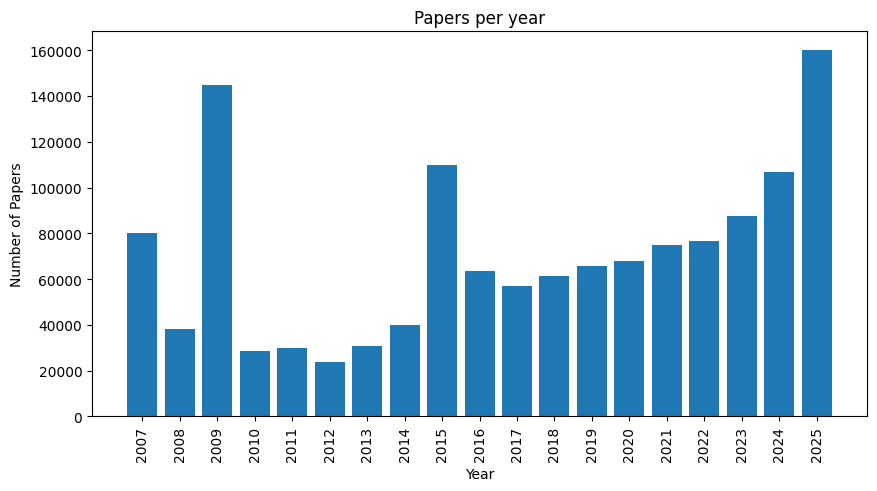

In [69]:
counts = Counter(years)
x = sorted(counts.keys())
y = [counts[k] for k in x]

plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Papers per year")
plt.xticks(x,rotation=90)
plt.show()

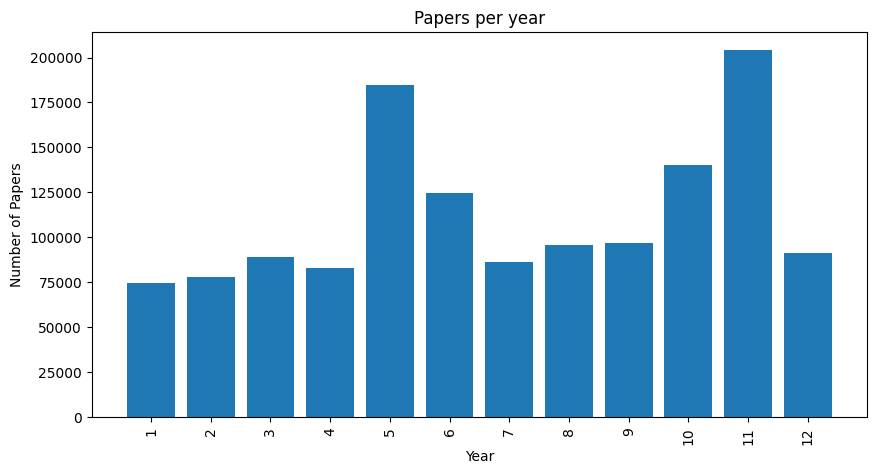

In [70]:
counts = Counter(months)
x = sorted(counts.keys())
y = [counts[k] for k in x]

plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Papers per year")
plt.xticks(x,rotation=90)
plt.show()

In [77]:
final2["year"] = years

In [84]:
final2 = final2[final2["year"].isin([2025])] #picking 2025 for itter1 - testing

In [88]:
data = pd.DataFrame({"categories":final2.categories.value_counts().index,"Count":final2.categories.value_counts().values})

In [89]:
final2 = final2[final2["categories"].isin(data.loc[data["Count"]>5000,"categories"].tolist())]

In [90]:
final2 = final2[["title","categories","abstract"]]

In [92]:
final2.categories.value_counts()

categories
cs.CV          19487
cs.LG           9750
quant-ph        9308
cs.CL           8915
cs.LG cs.AI     6510
cs.CL cs.AI     5028
Name: count, dtype: int64

In [93]:
final2.to_csv("arxiv-checkpoint3.tsv",sep="\t",index=False)